# Libraries used

Running Kernel3.9.13 base anaconda

pip install squarify
pip install yellowbrick
pip install plotly
pip install seaborn
pip install lazypredict
pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings

from imblearn.over_sampling import SMOTE


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#rfc using regularization and gridsearch to find the best parameters for the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df.head(2)

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [4]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# Importing previous dataset

In [5]:
#point to the folder where the data is stored
os.chdir(r"C:\Users\pedro\datathon")

# Loading combined_mod dataset
train_consolidated = pd.read_csv('train_consolidated.csv')


In [6]:
train_consolidated.head(1)

,PipeId,InspectionYear,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,NumConnectionsUnder,BoolBridle,No_Inspections,No_Incidences_Total,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,489616,2013,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,0,0,1,0,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50


In [7]:
#creating a subset for altering the dataset after initial EDA
df_baseline = train_consolidated.copy()


In [8]:
df_baseline.columns

Index(['PipeId', 'InspectionYear', 'MonthsLastRev', 'Incidence', 'Province',
       'Town', 'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections',
       'NumConnectionsUnder', 'BoolBridle', 'No_Inspections',
       'No_Incidences_Total', 'average_severity_pipe', 'relative_risk',
       'preventive_maintenance_rate', 'Probability_rate',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'Age_pipe_at_inspection', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'incidence_area',
       'connection_bool', 'Severity_high', 'Severity_medium', 'Severity_low',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average y

# Checking for more outliers hurting generalization of model

In [9]:
#min max of Pressure in df_baseline
df_baseline['Pressure'].min()
df_baseline['Pressure'].max()



0.025

80.0

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Pressure'>

Text(0.5, 1.0, 'Pressure distribution')

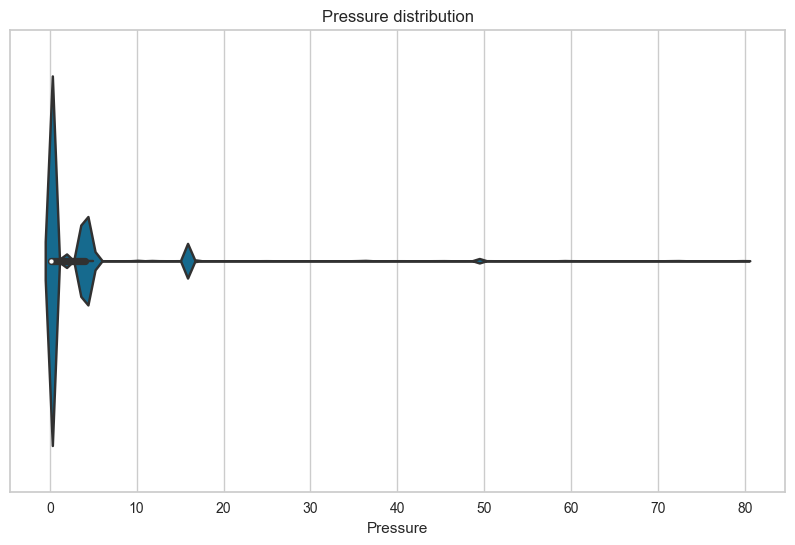

In [10]:
#plot pressure distribution with a violin plo
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pressure', data=df_baseline)
plt.title('Pressure distribution')
plt.show()


In [11]:
#delete outliers higher than 20 in Pressure for df_baseline
df_baseline = df_baseline[df_baseline['Pressure'] < 20]

0.005

5128.307

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Length'>

Text(0.5, 1.0, 'Length distribution')

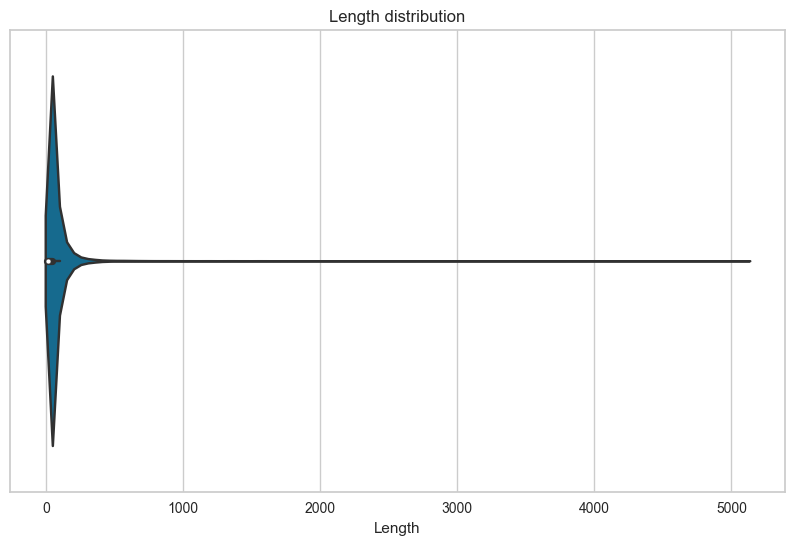

In [12]:
#check outliers in length
df_baseline['Length'].min()
df_baseline['Length'].max()

#plot length distribution with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Length', data=df_baseline)
plt.title('Length distribution')
plt.show()

In [13]:
#delete outliers higher than 400 in length for df_baseline
df_baseline = df_baseline[df_baseline['Length'] < 100]

In [14]:
#check nulls
df_baseline.shape

(5494091, 48)

0

33

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='NumConnections'>

Text(0.5, 1.0, 'NumConnections distribution')

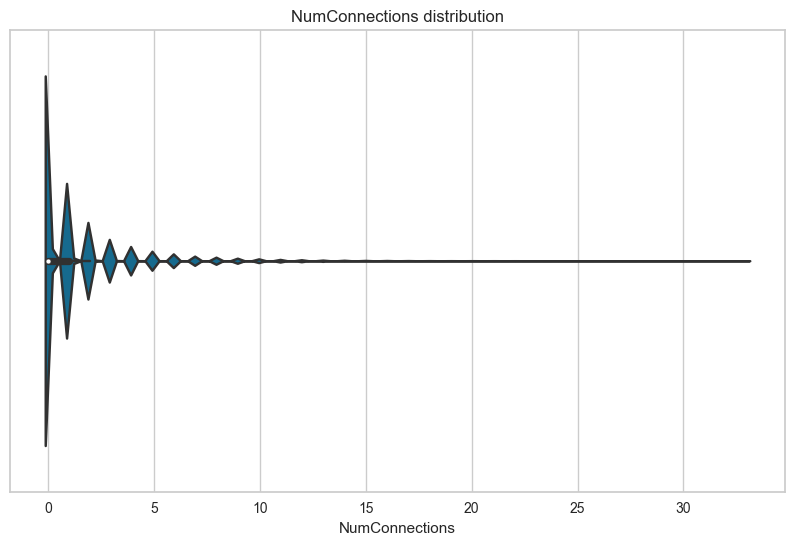

In [15]:
#checking outliers for num_connections
df_baseline['NumConnections'].min()
df_baseline['NumConnections'].max()

#plot num_connections distribution with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='NumConnections', data=df_baseline)
plt.title('NumConnections distribution')
plt.show()


In [16]:
#dropping NumConnections higher than 7
df_baseline = df_baseline[df_baseline['NumConnections'] < 5]


0

2

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='NumConnectionsUnder'>

Text(0.5, 1.0, 'NumConnectionsUnder distribution')

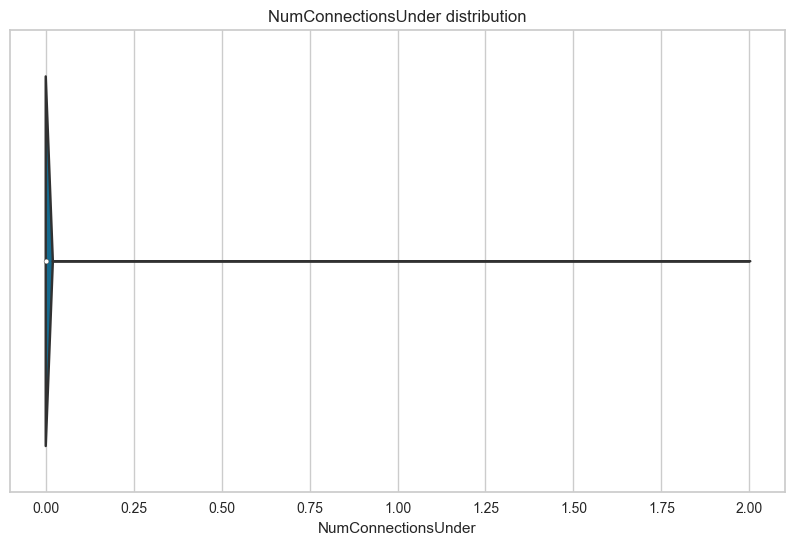

In [17]:
#checking outliers for NumConnectionsUnder
df_baseline['NumConnectionsUnder'].min()
df_baseline['NumConnectionsUnder'].max()

#plot num_connections distribution with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='NumConnectionsUnder', data=df_baseline)
plt.title('NumConnectionsUnder distribution')
plt.show()


In [18]:
#dropping NumConnectionsUnder because mostly 0
df_baseline = df_baseline.drop(['NumConnectionsUnder'], axis=1)



In [19]:
#check values for BoolBridle
df_baseline['BoolBridle'].value_counts()


0    5326478
Name: BoolBridle, dtype: int64

In [20]:
#Deleting BoolBridle because mostly one kind
df_baseline = df_baseline.drop(['BoolBridle'], axis=1)

0.0005756578947368

36355.2

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='aspect'>

Text(0.5, 1.0, 'Aspect distribution')

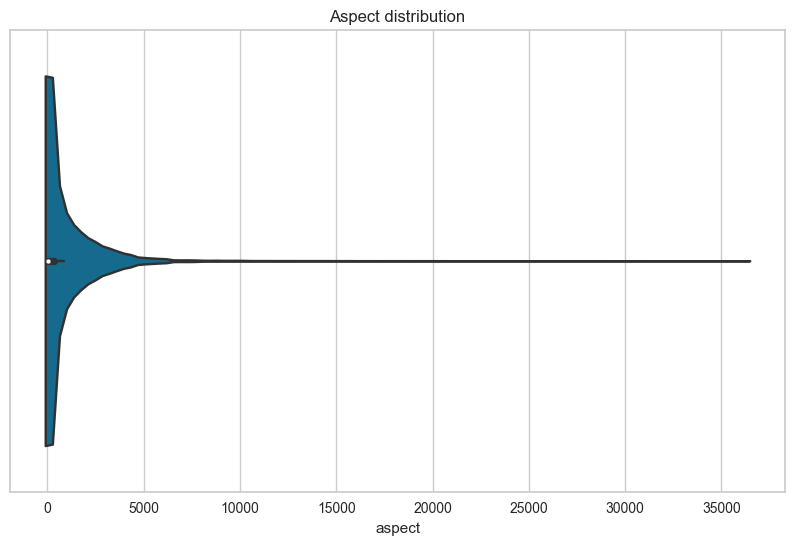

In [21]:
#check outliers for aspect
df_baseline['aspect'].min()
df_baseline['aspect'].max()

#plot aspect distribution with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='aspect', data=df_baseline)
plt.title('Aspect distribution')
plt.show()


In [22]:
#drop aspect outliers higher than 6000
df_baseline = df_baseline[df_baseline['aspect'] < 1000]


In [23]:
df_baseline.head(1)

,PipeId,InspectionYear,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,No_Inspections,No_Incidences_Total,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours)
0,489616,2013,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,1,0,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50


In [24]:
df_baseline.shape

(4530420, 46)

final shape after taking care of few outliers.

2 million less

# Merging another dataset

In [25]:
#point to the folder where the data is stored for Pedro
os.chdir(r"C:\Users\pedro\datathon\base\complementary_datasets")

#Loading sample_submission
density = pd.read_excel('population_density_province.xlsx')

In [26]:
density.head(1)

,Province,Area (sq km),Year,Population,Population density (persons/sqkm)
0,Albacete,14926,2022,385727,25.84


In [27]:
normalize_characters(density, 'Province')

,Province,Area (sq km),Year,Population,Population density (persons/sqkm)
0,albacete,14926,2022,385727,25.84
1,albacete,14926,2021,386464,25.89


In [28]:
#join density to df_baseline on Province taking only rows with year 2020
df_baseline = df_baseline.merge(density[density['Year'] == 2020], on='Province', how='left')
df_baseline.head(1)

,PipeId,InspectionYear,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,No_Inspections,No_Incidences_Total,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),Area (sq km),Year,Population,Population density (persons/sqkm)
0,489616,2013,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,1,0,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,19813,2020,495045,24.99


In [29]:
#compare array for column Province in density and df_baseline and compute set difference
np.setdiff1d(density['Province'].unique(), df_baseline['Province'].unique())


array([], dtype=object)

In [30]:
df_baseline.head(1)

,PipeId,InspectionYear,MonthsLastRev,Incidence,Province,Town,YearBuilt,Diameter,Length,Pressure,NumConnections,No_Inspections,No_Incidences_Total,average_severity_pipe,relative_risk,preventive_maintenance_rate,Probability_rate,Average_MonthsLastRev,pipe_inspected_frequently,Age_pipe_at_inspection,aspect,Relative_Thickness,pipe_area,Total_Connections,area_connection,incidence_area,connection_bool,Severity_high,Severity_medium,Severity_low,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average yearly temperature (°C),Min. Temperature (°C),Max. Temperature (°C),Yearly Rainfall (mm),Average year Humidity (%),Rainy days per year (days),Yearly Sun Hours (hours),Area (sq km),Year,Population,Population density (persons/sqkm)
0,489616,2013,16,0,ciudad real,Torralba de Calatrava,2012,0.06,7.79,0.40,0,1,0,4.00,0.00,0.00,0.00,21.40,1,1,49.47,0.16,1.54,0,0.00,0.00,0,0,0,0,1,0,0,0,1,0,0.00,60.72,0.16,15.44,1.50,33.70,438,0.55,52,107.50,19813,2020,495045,24.99


In [31]:
del density

In [32]:
#dropping Year, Population, Area (sq km) from df_baseline
df_baseline = df_baseline.drop(['Year', 'Population', 'Area (sq km)'], axis=1)

# Correlation Matrix

In [37]:
#correlation matrix for df_baseline with threshold of 0.75
corr_matrix = df_baseline.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop


[]

In [34]:
df_baseline.columns


Index(['PipeId', 'InspectionYear', 'MonthsLastRev', 'Incidence', 'Province',
       'Town', 'YearBuilt', 'Diameter', 'Length', 'Pressure', 'NumConnections',
       'No_Inspections', 'No_Incidences_Total', 'average_severity_pipe',
       'relative_risk', 'preventive_maintenance_rate', 'Probability_rate',
       'Average_MonthsLastRev', 'pipe_inspected_frequently',
       'Age_pipe_at_inspection', 'aspect', 'Relative_Thickness', 'pipe_area',
       'Total_Connections', 'area_connection', 'incidence_area',
       'connection_bool', 'Severity_high', 'Severity_medium', 'Severity_low',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)',
       'Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)',
       'Rainy days per ye

In [35]:
#drop columns
df_baseline = df_baseline.drop(['InspectionYear', 'Province','Town', 'YearBuilt', 
       'average_severity_pipe','relative_risk', 'preventive_maintenance_rate', 'Probability_rate',
       'pipe_inspected_frequently', 'pipe_area','Total_Connections', 'incidence_area',
       'connection_bool', 'Severity_high', 'Severity_medium', 'Severity_low','Diameter2',
       'Length2', 'Pressure2', 'Average yearly temperature (°C)','Min. Temperature (°C)', 'Max. Temperature (°C)',
       'Yearly Rainfall (mm)', 'Average year Humidity (%)','Rainy days per year (days)'], axis=1)


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: >

Text(0.5, 1.0, 'Correlation matrix for df_baseline')

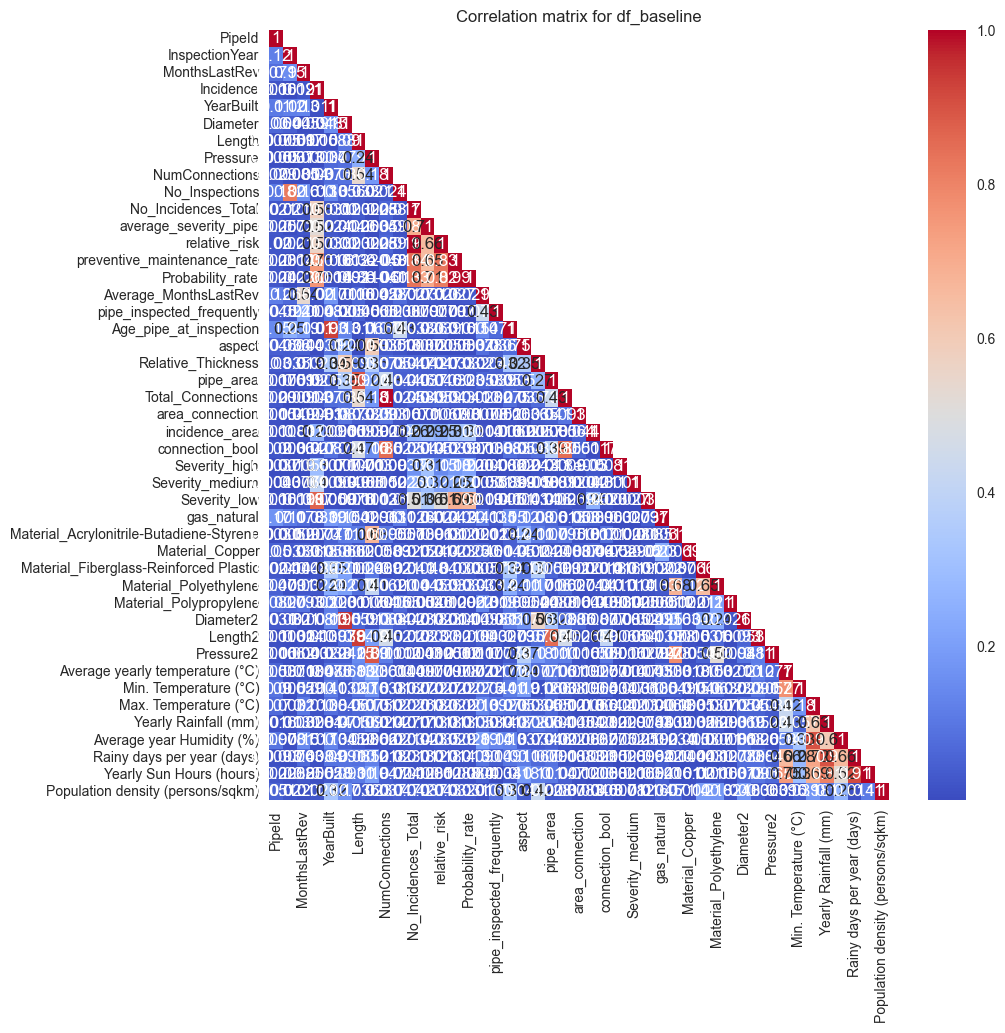

In [36]:
#show correlation matrix for df_baseline in a heatmap with threshold of 0.75, just one half
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=np.triu(corr_matrix, k=1))
plt.title('Correlation matrix for df_baseline')
plt.show()





# Standardize dataframe

In [38]:
df_baseline.head(1)

,PipeId,MonthsLastRev,Incidence,Diameter,Length,Pressure,NumConnections,No_Inspections,No_Incidences_Total,Average_MonthsLastRev,Age_pipe_at_inspection,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Population density (persons/sqkm)
0,489616,16,0,0.06,7.79,0.40,0,1,0,21.40,1,49.47,0.16,0.00,1,0,0,0,1,0,107.50,24.99


In [39]:
df_baseline.columns

Index(['PipeId', 'MonthsLastRev', 'Incidence', 'Diameter', 'Length',
       'Pressure', 'NumConnections', 'No_Inspections', 'No_Incidences_Total',
       'Average_MonthsLastRev', 'Age_pipe_at_inspection', 'aspect',
       'Relative_Thickness', 'area_connection', 'gas_natural',
       'Material_Acrylonitrile-Butadiene-Styrene', 'Material_Copper',
       'Material_Fiberglass-Reinforced Plastic', 'Material_Polyethylene',
       'Material_Polypropylene', 'Yearly Sun Hours (hours)',
       'Population density (persons/sqkm)'],
      dtype='object')

In [40]:
#Use minmax scaler to scale these columns in df_baseline: 'MonthsLastRev', 'Diameter', 'Length','Pressure', 'NumConnections', 'No_Inspections', 'No_Incidences_Total','Average_MonthsLastRev', 'Age_pipe_at_inspection', 'aspect','Relative_Thickness', 'area_connection', 'gas_natural', 'Yearly Sun Hours (hours)','Population density (persons/sqkm)'
scaler = MinMaxScaler()
df_baseline[['MonthsLastRev', 'Diameter', 'Length','Pressure', 'NumConnections', 'No_Inspections', 'No_Incidences_Total','Average_MonthsLastRev', 'Age_pipe_at_inspection', 'aspect','Relative_Thickness', 'area_connection', 'gas_natural', 'Yearly Sun Hours (hours)','Population density (persons/sqkm)']] = scaler.fit_transform(df_baseline[['MonthsLastRev', 'Diameter', 'Length','Pressure', 'NumConnections', 'No_Inspections', 'No_Incidences_Total','Average_MonthsLastRev', 'Age_pipe_at_inspection', 'aspect','Relative_Thickness', 'area_connection', 'gas_natural', 'Yearly Sun Hours (hours)','Population density (persons/sqkm)']])
df_baseline.head(1)




,PipeId,MonthsLastRev,Incidence,Diameter,Length,Pressure,NumConnections,No_Inspections,No_Incidences_Total,Average_MonthsLastRev,Age_pipe_at_inspection,aspect,Relative_Thickness,area_connection,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Yearly Sun Hours (hours),Population density (persons/sqkm)
0,489616,0.41,0,0.09,0.08,0.02,0.00,0.00,0.00,0.28,0.02,0.05,0.01,0.00,1.00,0,0,0,1,0,0.71,0.02


In [ ]:
#min max standardization for these columns in df_baseline: 

# Pandas Profiling Report

In [ ]:
#pandas profiling report for df_baseline
#profile = ProfileReport(df_baseline, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#profile.to_file('df_baseline.html')


# Exporting file for notebook 4

In [ ]:
#exporting df_baseline to csv
os.chdir(r"C:\Users\pedro\datathon")
df_baseline.to_csv('df_baseline.csv', index=False)
